In [48]:
from pandas import read_csv
from matplotlib import pyplot

In [49]:
airline=read_csv("C:\\Users\\yugan\\OneDrive\\Desktop\\Airlines+Data.csv",header=0,index_col=0,parse_dates=True)
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


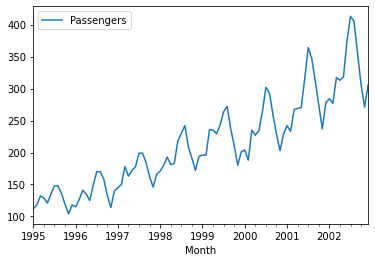

In [50]:
airline.plot()
pyplot.show()

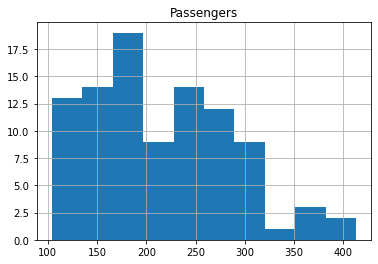

In [51]:
airline.hist()
pyplot.show()

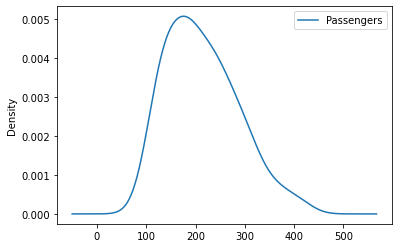

In [52]:
airline.plot(kind='kde')
pyplot.show()

In [54]:
type(read_csv("C:\\Users\\yugan\\OneDrive\\Desktop\\Airlines+Data.csv"))

pandas.core.frame.DataFrame

In [55]:
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time
import datetime
import statsmodels.api as sm
import warnings

In [56]:
airline=read_csv("C:\\Users\\yugan\\OneDrive\\Desktop\\Airlines+Data.csv",header=0,index_col=0,parse_dates=True,squeeze=True)


In [57]:
groups = airline.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
    
years 

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


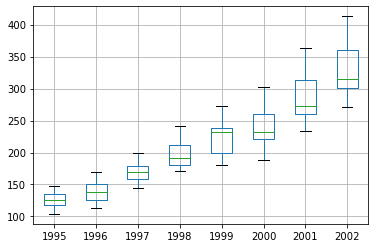

In [58]:
years.boxplot()
pyplot.show()

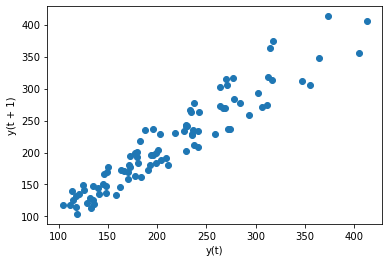

In [59]:
from pandas.plotting import lag_plot
airline=read_csv("C:\\Users\\yugan\\OneDrive\\Desktop\\Airlines+Data.csv",header=0,index_col=0,parse_dates=True)
lag_plot(airline)
pyplot.show()

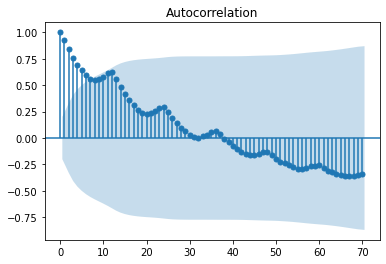

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airline,lags=70)
pyplot.show()

In [62]:
len(airline['Passengers'])

96

In [63]:
Train=airline.head(60)
Test=airline.tail(36)

In [64]:
list(range(2,24,6))


[2, 8, 14, 20]

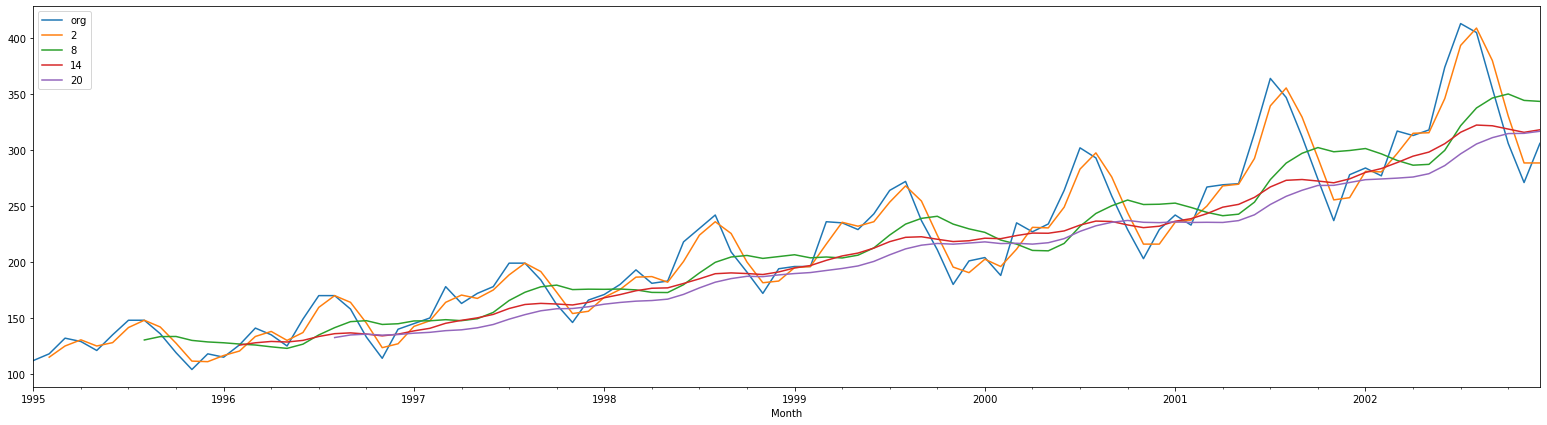

In [65]:
plt.figure(figsize=(27,7))
airline.Passengers.plot(label="org")
for i in range(2,24,6):
    airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

<ipython-input-66-44f73d9533b3>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add=seasonal_decompose(airline.Passengers,freq=25)


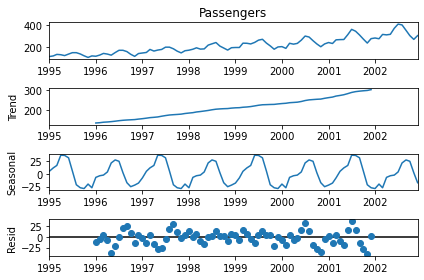

In [66]:
decompose_ts_add=seasonal_decompose(airline.Passengers,freq=25)
decompose_ts_add.plot()
plt.show()

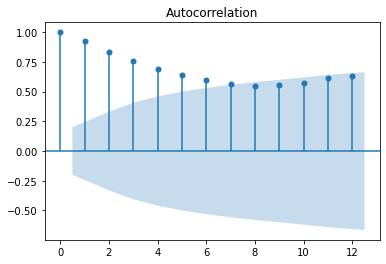

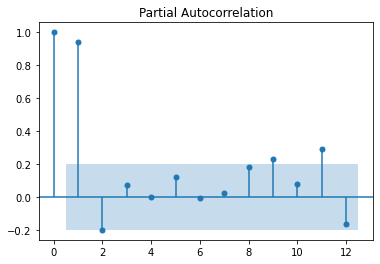

In [67]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline.Passengers,lags=12)
tsa_plots.plot_pacf(airline.Passengers,lags=12)
plt.show()

In [69]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [70]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Passengers)

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


22.209687323251686

In [71]:
hw_model=Holt(Train["Passengers"]).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-71-ee0b1b47a57b>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model=Holt(Train["Passengers"]).fit(smoothing_level=0.8,smoothing_slope=0.2)


63.76314530644007

In [72]:
hwe_model_add_add=ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


12.20903474019934

In [73]:
hwe_model_mul_add=ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add=hwe_model_mul_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


8.666751159542835

In [75]:
hwe_model_add_add=ExponentialSmoothing(airline["Passengers"],seasonal='add',trend="add",seasonal_periods=12).fit()

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [76]:
hwe_model_add_add.forecast(10)

2003-01-01    319.235227
2003-02-01    311.528305
2003-03-01    350.278564
2003-04-01    346.984767
2003-05-01    351.844772
2003-06-01    403.925556
2003-07-01    440.566749
2003-08-01    427.446597
2003-09-01    376.628325
2003-10-01    329.767601
Freq: MS, dtype: float64

In [77]:
#COCA COLA

In [107]:
cola=read_csv("C:\\Users\\yugan\\OneDrive\\Desktop\\CocaCola_Sales_Rawdata.csv",header=0,index_col=0,parse_dates=True)
cola

,Sales
Quarter,
1_86,1734.827000
2_86,2244.960999
3_86,2533.804993
4_86,2154.962997
1_87,1547.818996
2_87,2104.411995
3_87,2014.362999
4_87,1991.746998
1_88,1869.049999


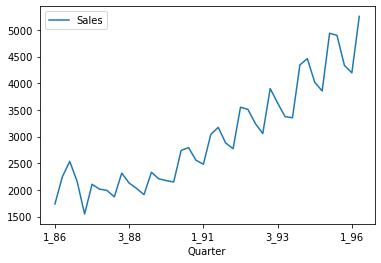

In [108]:
cola.plot()
pyplot.show()

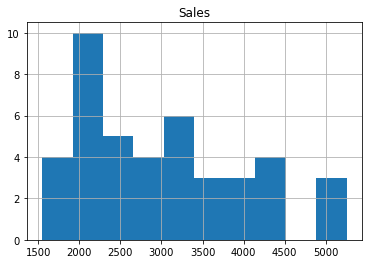

In [109]:
cola.hist()
pyplot.show()

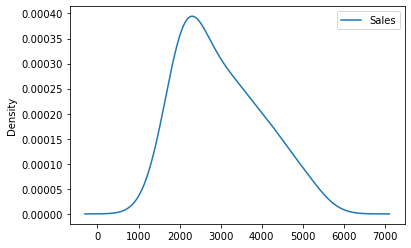

In [110]:
cola.plot(kind='kde')
pyplot.show()

In [113]:
type(read_csv("C:\\Users\\yugan\\OneDrive\\Desktop\\CocaCola_Sales_Rawdata.csv"))

pandas.core.frame.DataFrame

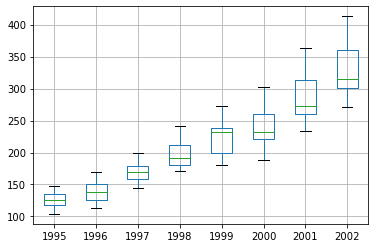

In [114]:
years.boxplot()
pyplot.show()

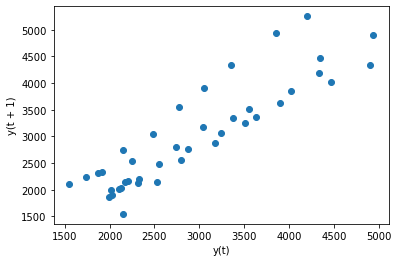

In [115]:
from pandas.plotting import lag_plot
cola=read_csv("C:\\Users\\yugan\\OneDrive\\Desktop\\CocaCola_Sales_Rawdata.csv",header=0,index_col=0,parse_dates=True)
lag_plot(cola)
pyplot.show()

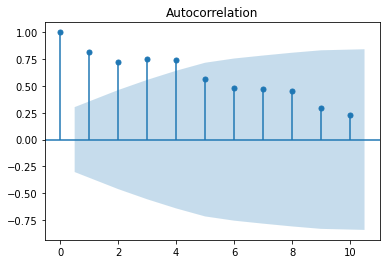

In [118]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(cola,lags=10)
pyplot.show()

<AxesSubplot:xlabel='Quarter'>

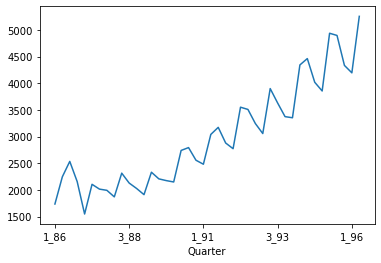

In [119]:
cola.Sales.plot()

In [120]:
len(cola['Sales'])

42

In [121]:
Train=cola.head(147)
Test=cola.tail(12)

In [122]:
list(range(2,24,6))

[2, 8, 14, 20]

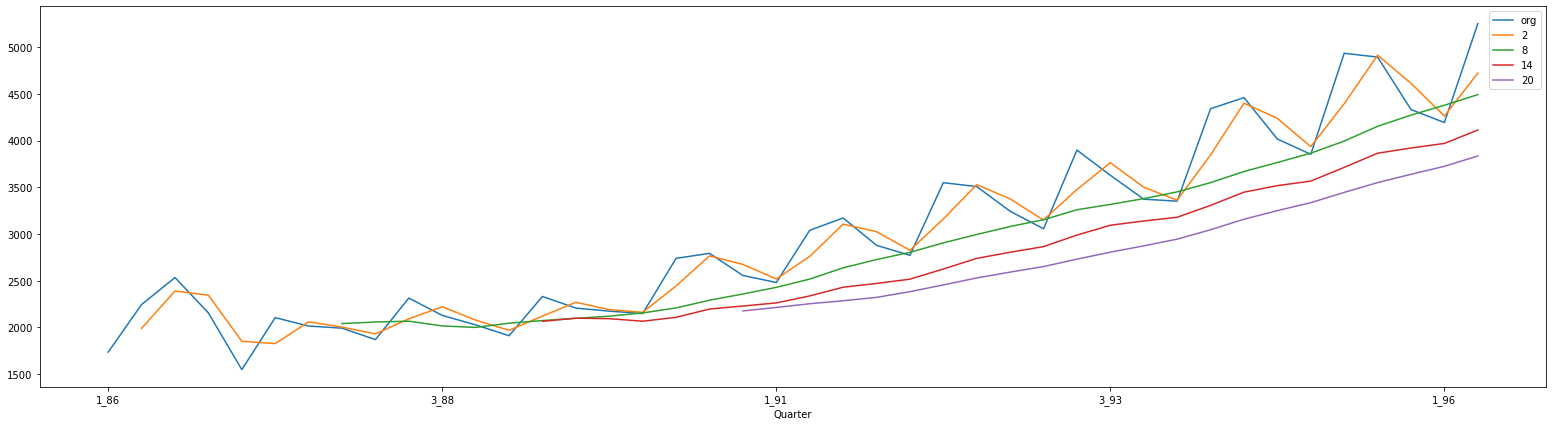

In [123]:
plt.figure(figsize=(27,7))
cola.Sales.plot(label="org")
for i in range(2,24,6):
    cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')    

<ipython-input-128-292b40dfab7f>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add=seasonal_decompose(cola.Sales,freq=10)


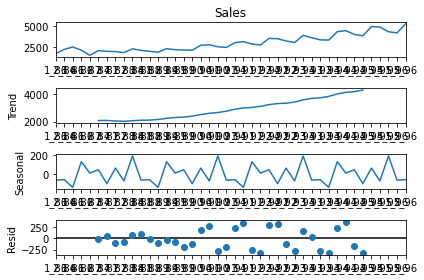

In [128]:
decompose_ts_add=seasonal_decompose(cola.Sales,freq=10)
decompose_ts_add.plot()
plt.show()

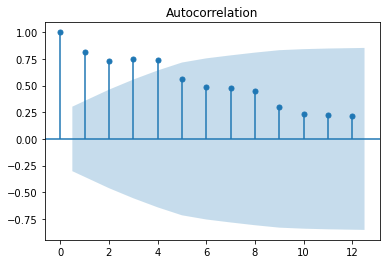

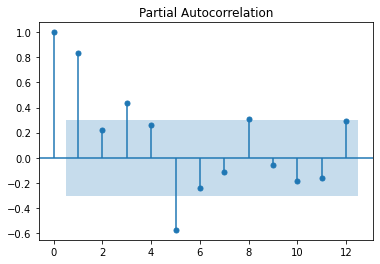

In [129]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola.Sales,lags=12)
tsa_plots.plot_pacf(cola.Sales,lags=12)
plt.show()

In [130]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [131]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Sales)

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


11.03905451650869

In [132]:
hw_model=Holt(Train["Sales"]).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
<ipython-input-132-84c2ec55ac88>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model=Holt(Train["Sales"]).fit(smoothing_level=0.8,smoothing_slope=0.2)


11.454382241100609

In [133]:
hwe_model_add_add=ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


4.710280692978781

In [134]:
hwe_model_mul_add=ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add=hwe_model_mul_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


2.135544428560373

In [135]:
hwe_model_add_add=ExponentialSmoothing(cola["Sales"],seasonal='add',trend="add",seasonal_periods=12).fit()

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [136]:
hwe_model_add_add.forecast(10)

C:\Users\yugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


42    4956.431837
43    4792.486321
44    4841.314464
45    5711.514164
46    5734.582476
47    5319.635297
48    5213.954232
49    6154.696447
50    6021.590487
51    5576.900347
dtype: float64